In [1]:
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import pandas as pd 

# Derby Air Pollution Project

## Workflow

1) Get data from URL

2) Clean data

3) Plot graph per hour

4) Plot graph per day etc, do resampling

## 1) Get data for Derby St Alkmund's Way monitoring site
From [this website](https://uk-air.defra.gov.uk/data/flat_files?site_id=DESA)

In [2]:
URL_2020 = 'https://uk-air.defra.gov.uk/data_files/site_data/DESA_2020.csv'
URL_2019 = 'https://uk-air.defra.gov.uk/data_files/site_data/DESA_2019.csv'
URL_2018 = 'https://uk-air.defra.gov.uk/data_files/site_data/DESA_2018.csv'
URL_2017 = 'https://uk-air.defra.gov.uk/data_files/site_data/DESA_2017.csv' 

In [3]:
from urllib.request import urlretrieve
urlretrieve(URL_2020,'data_2020.csv')
urlretrieve(URL_2019,'data_2019.csv')
urlretrieve(URL_2018,'data_2018.csv')
urlretrieve(URL_2017,'data_2017.csv')

('data_2017.csv', <http.client.HTTPMessage at 0x1afde2a1588>)

In [4]:
# skip top 4 rows as they're empty
df_2020 = pd.read_csv('data_2020.csv',skiprows=4)
df_2019 = pd.read_csv('data_2019.csv',skiprows=4)
df_2018 = pd.read_csv('data_2018.csv',skiprows=4)
df_2017 = pd.read_csv('data_2017.csv',skiprows=4)

## Data Cleaning 1
Issue with the data: 
- what should be "02-01-2020" and "00:00" is called "01-01-2020"  and "24:00" which Pandas doesn't like
- Need to take every instance where this happens and + 1 to the date and replace 24:00 with 00:00
- Replacing 24:00 with 00:00 will be easy 
- But will need to iterate over column to replace date

# I know below is hideous and I should have made a function rather than copying and pasting but I was in a rush ok 

In [5]:
#df_2020
df_2020['Date'] = pd.to_datetime(df_2020['Date']).dt.strftime('%d-%m-%Y')
df_2020['Date'] = pd.to_datetime(df_2020['Date'])

# replacing instances where date is x and time is 24:00
# want date to become x + 1 i.e. 2nd Jan instead of 1st Jan
# and want 24:00 to become 00:00
# i.e. 1/1/2020 24:00 becomes 2/1/2020 00:00

# date + 1 for every 24th entry 
counter = 0
for i, row in df_2020.iterrows():
    counter += 1
    if counter % 24 == 0:
        value = df_2020.at[i,'Date'] + pd.Timedelta(1,unit='d')
        df_2020.at[i,'Date'] = value

# cleaning up columns and data types in a really janky way
df_2020['time'] = df_2020['time'].replace(to_replace='24:00',value='00:00')
df_2020['Date String'] = df_2020['Date'].astype(str)
df_2020['Date Time String'] = df_2020['Date String'] + " " + df_2020['time']
df_2020['Date Time'] = pd.to_datetime(df_2020['Date Time String'])
df_2020.drop(['Date','time','status','unit','status.1','unit.1','status.2','unit.2','Date String','Date Time String'],
             axis=1,inplace=True)
df_2020['Date Time'] = pd.to_datetime(df_2020['Date Time'])
df_2020.set_index('Date Time',inplace = True) # should fix an error I've been getting
df_2020['Date Time No Year'] = df_2020.index.strftime('%m-%d %H:%M')

In [6]:
#df_2019
df_2019['Date'] = pd.to_datetime(df_2019['Date']).dt.strftime('%d-%m-%Y')
df_2019['Date'] = pd.to_datetime(df_2019['Date'])

# replacing instances where date is x and time is 24:00
# want date to become x + 1 i.e. 2nd Jan instead of 1st Jan
# and want 24:00 to become 00:00
# i.e. 1/1/2020 24:00 becomes 2/1/2020 00:00

# date + 1 for every 24th entry 
counter = 0
for i, row in df_2019.iterrows():
    counter += 1
    if counter % 24 == 0:
        value = df_2019.at[i,'Date'] + pd.Timedelta(1,unit='d')
        df_2019.at[i,'Date'] = value

# cleaning up columns and data types in a really janky way
df_2019['time'] = df_2019['time'].replace(to_replace='24:00',value='00:00')
df_2019['Date String'] = df_2019['Date'].astype(str)
df_2019['Date Time String'] = df_2019['Date String'] + " " + df_2019['time']
df_2019['Date Time'] = pd.to_datetime(df_2019['Date Time String'])
df_2019.drop(['Date','time','status','unit','status.1','unit.1','status.2','unit.2','Date String','Date Time String'],
             axis=1,inplace=True)
df_2019['Date Time'] = pd.to_datetime(df_2019['Date Time'])
df_2019.set_index('Date Time',inplace = True) # should fix an error I've been getting
df_2019['Date Time No Year'] = df_2019.index.strftime('%m-%d %H:%M')

In [7]:
#df_2018
df_2018['Date'] = pd.to_datetime(df_2018['Date']).dt.strftime('%d-%m-%Y')
df_2018['Date'] = pd.to_datetime(df_2018['Date'])

# replacing instances where date is x and time is 24:00
# want date to become x + 1 i.e. 2nd Jan instead of 1st Jan
# and want 24:00 to become 00:00
# i.e. 1/1/2020 24:00 becomes 2/1/2020 00:00

# date + 1 for every 24th entry 
counter = 0
for i, row in df_2018.iterrows():
    counter += 1
    if counter % 24 == 0:
        value = df_2018.at[i,'Date'] + pd.Timedelta(1,unit='d')
        df_2018.at[i,'Date'] = value

# cleaning up columns and data types in a really janky way
df_2018['time'] = df_2018['time'].replace(to_replace='24:00',value='00:00')
df_2018['Date String'] = df_2018['Date'].astype(str)
df_2018['Date Time String'] = df_2018['Date String'] + " " + df_2018['time']
df_2018['Date Time'] = pd.to_datetime(df_2018['Date Time String'])
df_2018.drop(['Date','time','status','unit','status.1','unit.1','status.2','unit.2','Date String','Date Time String'],
             axis=1,inplace=True)
df_2018['Date Time'] = pd.to_datetime(df_2018['Date Time'])
df_2018.set_index('Date Time',inplace = True) # should fix an error I've been getting
df_2018['Date Time No Year'] = df_2018.index.strftime('%m-%d %H:%M')

In [8]:
#df_2017
df_2017['Date'] = pd.to_datetime(df_2017['Date']).dt.strftime('%d-%m-%Y')
df_2017['Date'] = pd.to_datetime(df_2017['Date'])

# replacing instances where date is x and time is 24:00
# want date to become x + 1 i.e. 2nd Jan instead of 1st Jan
# and want 24:00 to become 00:00
# i.e. 1/1/2020 24:00 becomes 2/1/2020 00:00

# date + 1 for every 24th entry 
counter = 0
for i, row in df_2017.iterrows():
    counter += 1
    if counter % 24 == 0:
        value = df_2017.at[i,'Date'] + pd.Timedelta(1,unit='d')
        df_2017.at[i,'Date'] = value

# cleaning up columns and data types in a really janky way
df_2017['time'] = df_2017['time'].replace(to_replace='24:00',value='00:00')
df_2017['Date String'] = df_2017['Date'].astype(str)
df_2017['Date Time String'] = df_2017['Date String'] + " " + df_2017['time']
df_2017['Date Time'] = pd.to_datetime(df_2017['Date Time String'])
df_2017.drop(['Date','time','status','unit','status.1','unit.1','status.2','unit.2','Date String','Date Time String'],
             axis=1,inplace=True)
df_2017['Date Time'] = pd.to_datetime(df_2017['Date Time'])
df_2017.set_index('Date Time',inplace = True) # should fix an error I've been getting
df_2017['Date Time No Year'] = df_2017.index.strftime('%m-%d %H:%M')

In [9]:
frames = [df_2017,df_2018,df_2019,df_2020]

df_all = pd.concat(frames)

In [78]:
# is that cleaning done?
# move date time to first column
# start plotting!

C:\Users\alex.large\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


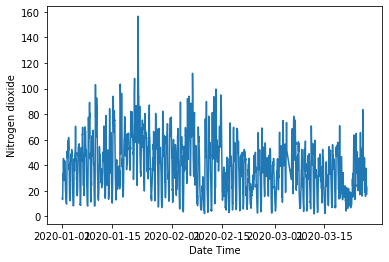

In [13]:
#sns.lineplot(x='Date Time',y='Nitric oxide',data=df_2020)
sns.lineplot(x=df_2020.index,y='Nitrogen dioxide',data=df_2020)
#sns.lineplot(x='Date Time',y='Nitrogen oxides as nitrogen dioxide',data=df_2020)

C:\Users\alex.large\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


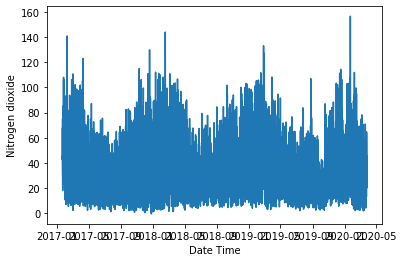

In [22]:
sns.lineplot(x=df_all.index,y='Nitrogen dioxide',data=df_all)

KeyError: "None of ['Date Time'] are in the columns"

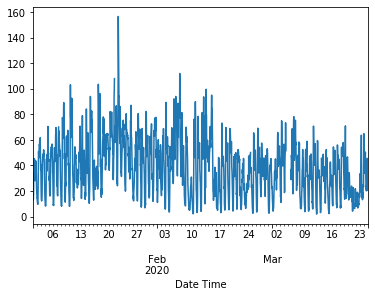

In [39]:
df_2020['Nitrogen dioxide'].plot(figsize=(15,10)) # now date and time are the index so don't need to state it 

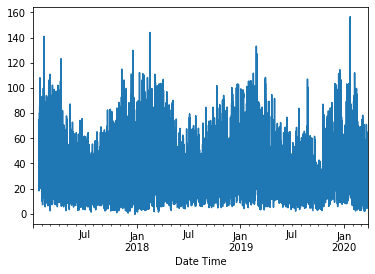

In [25]:
df_all['Nitrogen dioxide'].plot(figsize=(15,10))

Date Time
2020-01-05    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-12    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-19    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-26    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-02    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-09    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-16    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-01    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-08    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-15    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-29    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

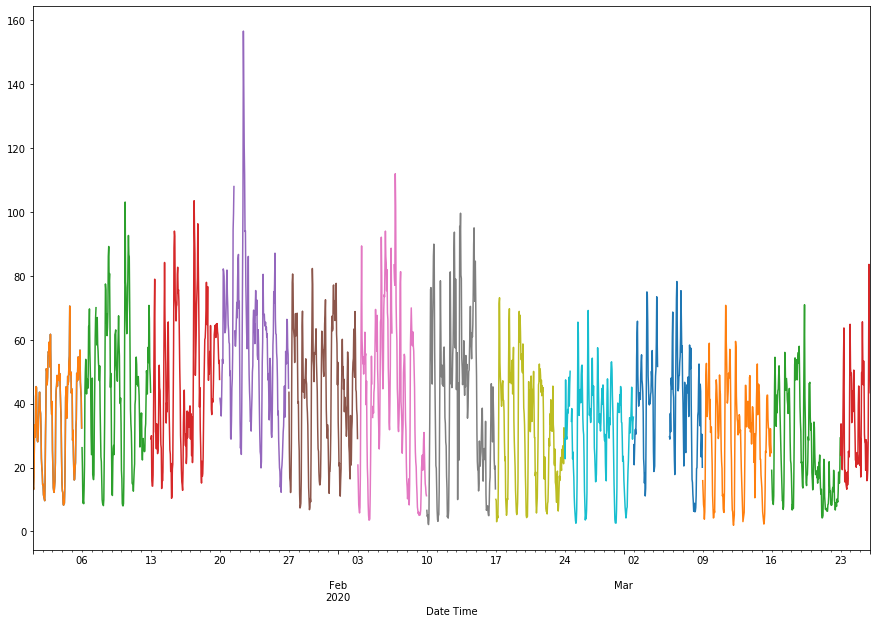

In [64]:
df_2020['Nitrogen dioxide'].resample('W').plot(figsize=(15,10))

Date Time
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

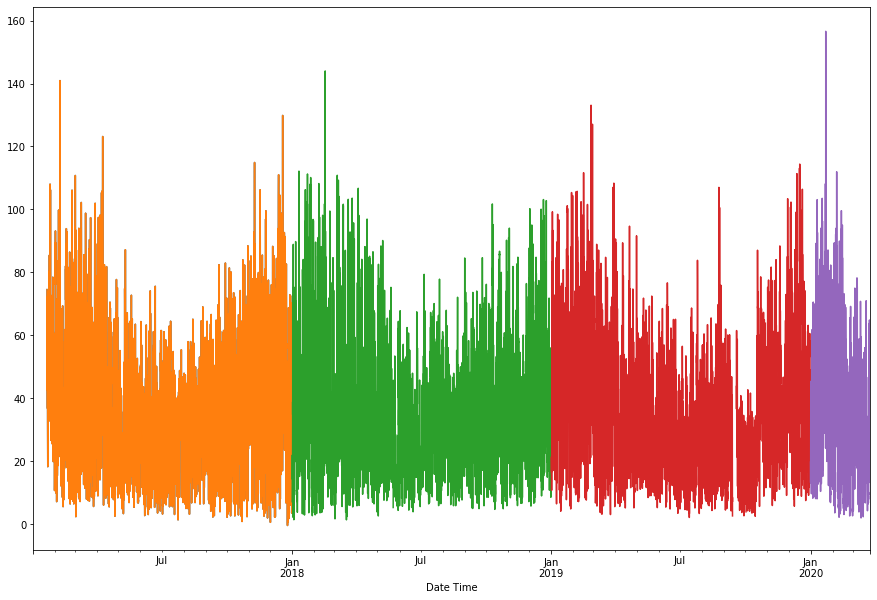

In [41]:
df_all['Nitrogen dioxide'].resample('Y').plot(figsize=(15,10))

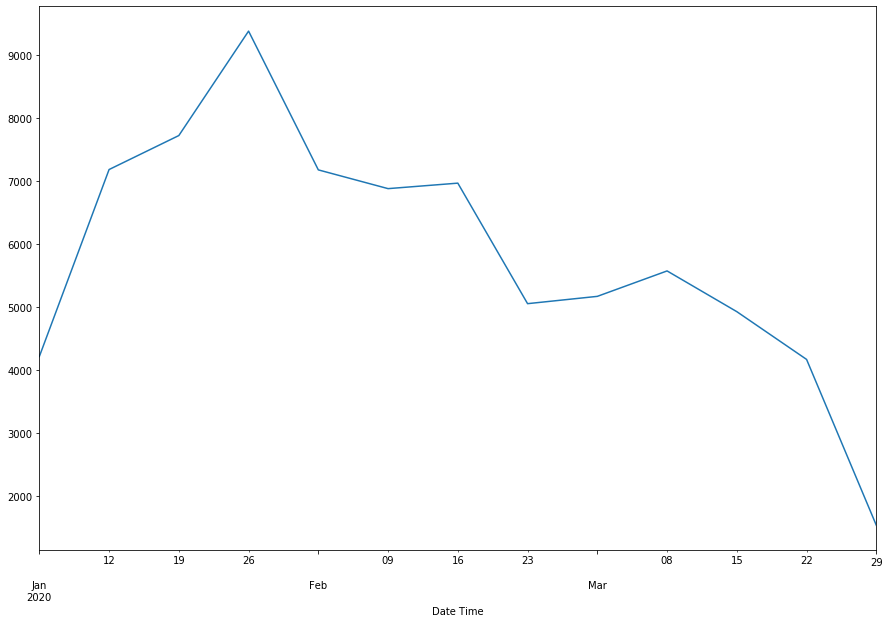

In [44]:
df_2020['Nitrogen dioxide'].resample('W').sum().plot(figsize=(15,10))

In [48]:
df_2020

,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Date Time No Year
Date Time,,,,
2020-01-01 01:00:00,0.65733,14.27299,15.28088,01-01 01:00
2020-01-01 02:00:00,0.11600,13.12549,13.30335,01-01 02:00
2020-01-01 03:00:00,1.62399,17.01551,19.50559,01-01 03:00
2020-01-01 04:00:00,8.43892,29.44246,42.38196,01-01 04:00
2020-01-01 05:00:00,7.33693,33.33440,44.58420,01-01 05:00
...,...,...,...,...
2020-03-25 20:00:00,13.84503,50.29875,71.52750,03-25 20:00
2020-03-25 21:00:00,65.23379,83.57625,183.60000,03-25 21:00
2020-03-25 22:00:00,29.06209,67.70250,112.26375,03-25 22:00


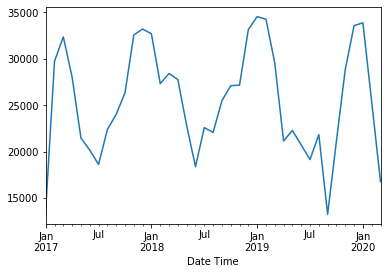

In [30]:
df_all['Nitrogen dioxide'].resample('M').sum().plot(figsize=(15,10))

## I want to look at March 2020

<Figure size 1152x1152 with 0 Axes>

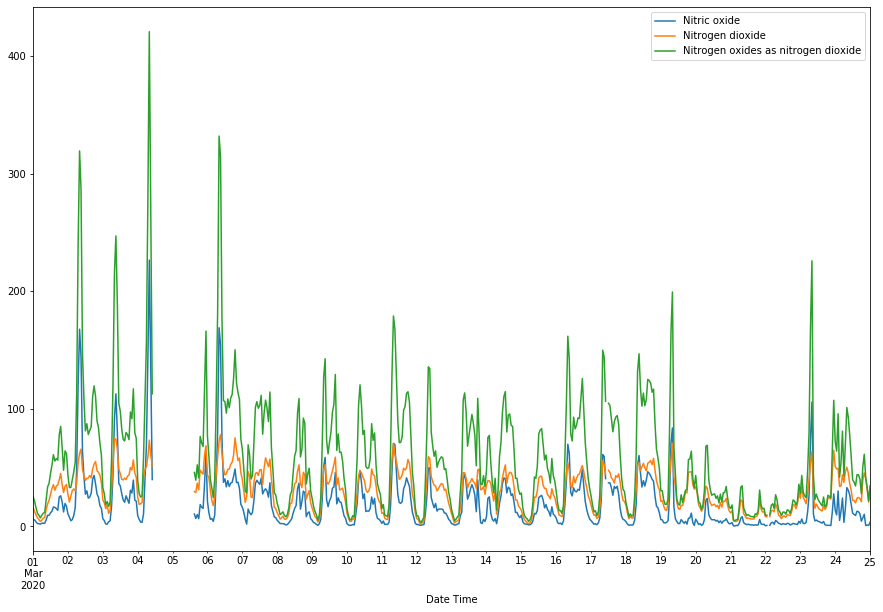

In [40]:
plt.figure(figsize=(16, 16))
df_all[df_all.index>='2020-03-01'].plot(figsize=(15,10)) # FUCK that was easy!! Python is lit

In [ ]:

df_all[df_all.index>='2020-03-01'].plot(figsize=(15,10)) # FUCK that was easy!! Python is lit

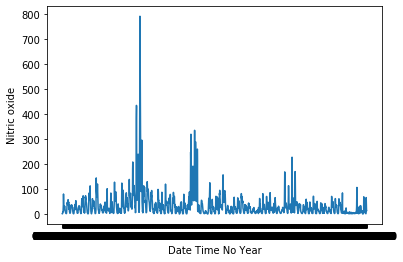

In [50]:
sns.lineplot(x=df_2020['Date Time No Year'],y=df_2020['Nitric oxide'])

In [12]:
df_2020

,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Date Time No Year
Date Time,,,,
2020-01-01 01:00:00,0.65733,14.27299,15.28088,01-01 01:00
2020-01-01 02:00:00,0.11600,13.12549,13.30335,01-01 02:00
2020-01-01 03:00:00,1.62399,17.01551,19.50559,01-01 03:00
2020-01-01 04:00:00,8.43892,29.44246,42.38196,01-01 04:00
2020-01-01 05:00:00,7.33693,33.33440,44.58420,01-01 05:00
...,...,...,...,...
2020-03-25 20:00:00,13.84503,50.29875,71.52750,03-25 20:00
2020-03-25 21:00:00,65.23379,83.57625,183.60000,03-25 21:00
2020-03-25 22:00:00,29.06209,67.70250,112.26375,03-25 22:00


# COMPARING MARCH OF EACH YEAR TO SEE WHAT CORONA HAS DONE

In [10]:
start_date = '03-01'
end_date = '03-31'

mask = (df_2020['Date Time No Year'] > start_date) & (df_2020['Date Time No Year'] <= end_date)
df_2020_mar = df_2020.loc[mask]
df_2020_mar2 = df_2020_mar.copy() # making a copy with the year still present for resampling
df_2020_mar.index = df_2020_mar['Date Time No Year'] # getting rid of date time so there's no year to confuse it

mask = (df_2019['Date Time No Year'] > start_date) & (df_2019['Date Time No Year'] <= end_date)
df_2019_mar = df_2019.loc[mask]
df_2019_mar2 = df_2019_mar.copy() # making a copy with the year still present for resampling
df_2019_mar.index = df_2019_mar['Date Time No Year'] # getting rid of date time so there's no year to confuse it

mask = (df_2018['Date Time No Year'] > start_date) & (df_2018['Date Time No Year'] <= end_date)
df_2018_mar = df_2018.loc[mask]
df_2018_mar2 = df_2018_mar.copy() # making a copy with the year still present for resampling
df_2018_mar.index = df_2018_mar['Date Time No Year'] # getting rid of date time so there's no year to confuse it


mask = (df_2017['Date Time No Year'] > start_date) & (df_2017['Date Time No Year'] <= end_date)
df_2017_mar = df_2017.loc[mask]
df_2017_mar2 = df_2017_mar.copy() # making a copy with the year still present for resampling
df_2017_mar.index = df_2017_mar['Date Time No Year'] # getting rid of date time so there's no year to confuse it


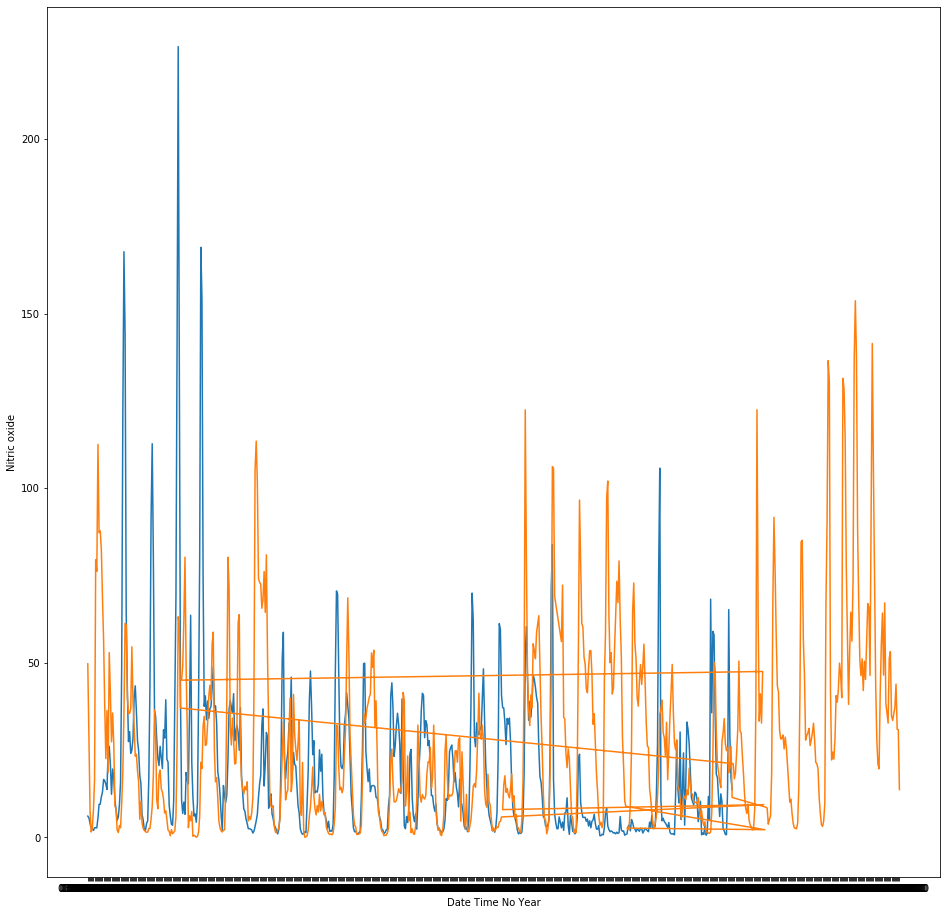

In [24]:
plt.figure(figsize=(16, 16))
sns.lineplot(x='Date Time No Year',y='Nitric oxide',data=df_2020_mar)
sns.lineplot(x='Date Time No Year',y='Nitric oxide',data=df_2019_mar)

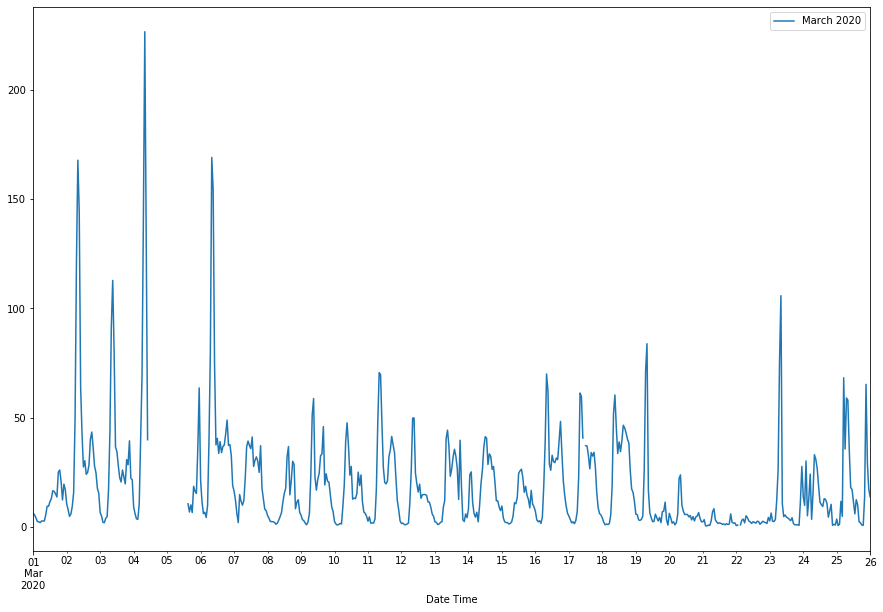

In [35]:
fig, ax = subplots()

df_2020_mar[['Date Time No Year','Nitric oxide']].plot(figsize=(15,10),ax=ax)
ax.legend(['March 2020'])


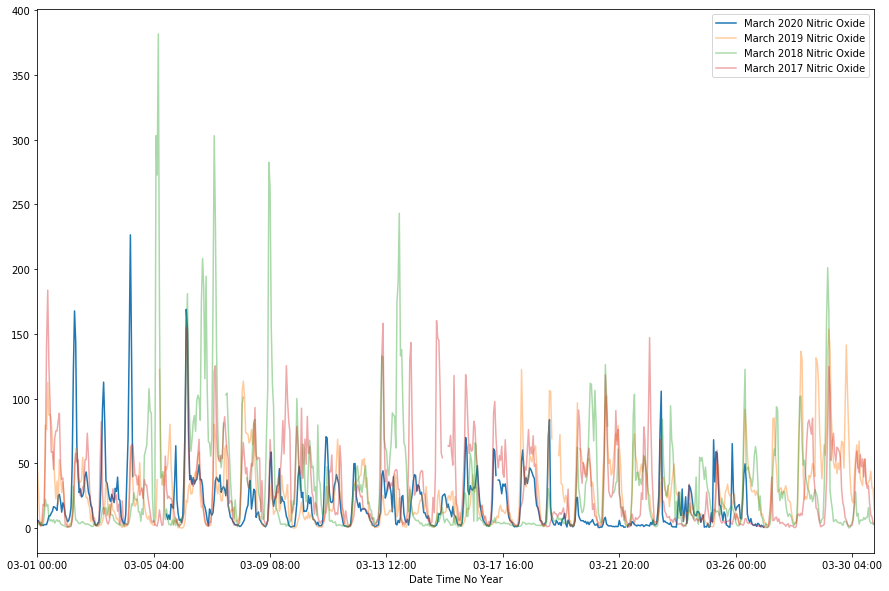

In [17]:
fig, ax = subplots()

df_2020_mar['Nitric oxide'].plot(figsize=(15,10),ax=ax)
ax.legend(['March 2020'])
df_2019_mar['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.4)
ax.legend(['March 2020','March 2019'])
df_2018_mar['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.4)
ax.legend(['March 2020','March 2019','March 2018'])
df_2017_mar['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.4)
ax.legend(['March 2020 Nitric Oxide','March 2019 Nitric Oxide','March 2018 Nitric Oxide','March 2017 Nitric Oxide'])


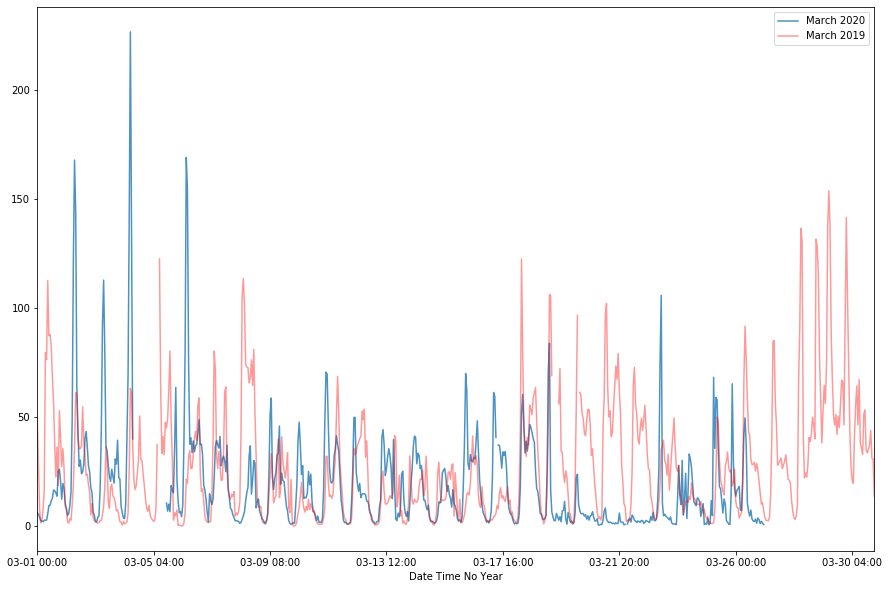

In [24]:
fig, ax = subplots()

df_2020_mar['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.8)
ax.legend(['March 2020'])
df_2019_mar['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.4,color='red',ls='-')
ax.legend(['March 2020','March 2019'])

In [27]:
# resampling
df_2020_mar_day =df_2020_mar2.resample('D').sum()
df_2020_mar_day['Date Time No Year'] = df_2020_mar_day.index.strftime('%m-%d %H:%M')
df_2020_mar_day_noyear = df_2020_mar_day.copy()
df_2020_mar_day_noyear.index = df_2020_mar_day_noyear['Date Time No Year'] # getting rid of date time so there's no year to confuse it

df_2019_mar_day =df_2019_mar2.resample('D').sum()
df_2019_mar_day['Date Time No Year'] = df_2019_mar_day.index.strftime('%m-%d %H:%M')
df_2019_mar_day_noyear = df_2019_mar_day.copy()
df_2019_mar_day_noyear.index = df_2019_mar_day_noyear['Date Time No Year'] # getting rid of date time so there's no year to confuse it

df_2018_mar_day =df_2018_mar2.resample('D').sum()
df_2018_mar_day['Date Time No Year'] = df_2018_mar_day.index.strftime('%m-%d %H:%M')
df_2018_mar_day_noyear = df_2018_mar_day.copy()
df_2018_mar_day_noyear.index = df_2018_mar_day_noyear['Date Time No Year'] # getting rid of date time so there's no year to confuse it

df_2017_mar_day =df_2017_mar2.resample('D').sum()
df_2017_mar_day['Date Time No Year'] = df_2017_mar_day.index.strftime('%m-%d %H:%M')
df_2017_mar_day_noyear = df_2017_mar_day.copy()
df_2017_mar_day_noyear.index = df_2017_mar_day_noyear['Date Time No Year'] # getting rid of date time so there's no year to confuse it

,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Date Time No Year
Date Time No Year,,,,
03-01 00:00,155.64993,389.20012,627.85998,03-01 00:00
03-02 00:00,122.73695,323.78870,511.98272,03-02 00:00
03-03 00:00,186.28011,535.92634,821.55183,03-03 00:00
03-04 00:00,480.34068,909.58744,1646.09950,03-04 00:00
03-05 00:00,1645.69264,1216.95530,3740.31545,03-05 00:00
03-06 00:00,1954.26111,1570.66043,4567.15234,03-06 00:00
03-07 00:00,2307.83426,1551.11821,5089.74808,03-07 00:00
03-08 00:00,853.74097,1117.82961,2426.88084,03-08 00:00
03-09 00:00,1274.98685,1076.11376,3031.06633,03-09 00:00


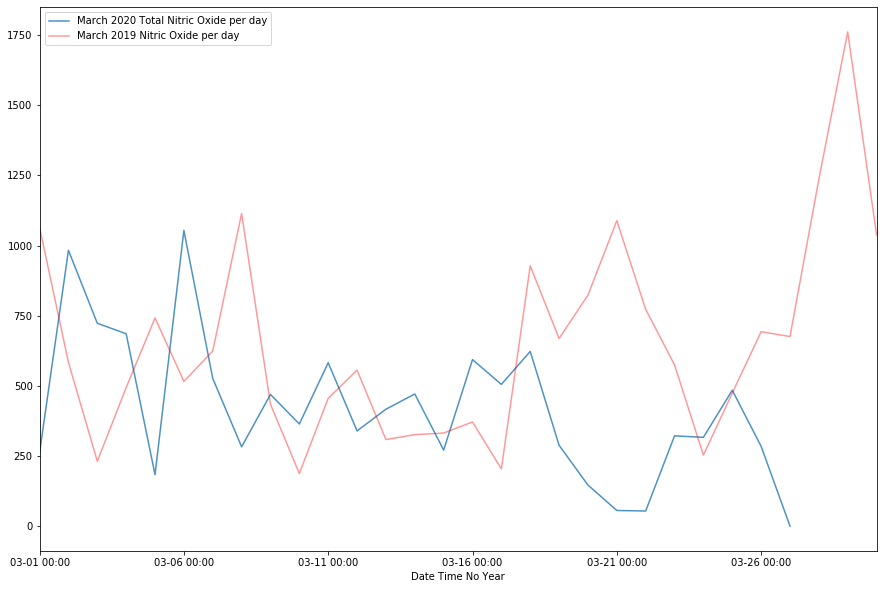

In [32]:
fig, ax = subplots()

df_2020_mar_day_noyear['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.8)
ax.legend(['March 2020 Total Nitric Oxide per day'])
df_2019_mar_day_noyear['Nitric oxide'].plot(figsize=(15,10),ax=ax,alpha=0.4,color='red',ls='-')
ax.legend(['March 2020 Total Nitric Oxide per day','March 2019 Nitric Oxide per day'])